<a href="https://colab.research.google.com/github/EddYRoMe/TalentoTech/blob/main/GHG_Emissions_FR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$ Llamando \space las \space librerías \space que \space voy \space a \space utilizar \space durante \space el \space análisis $$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns

# Estos paquetes me sirven para correr el PCA y verificar el comportamiento de los paises
import sklearn as sk
from sklearn.decomposition import PCA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


$$ Leyendo \space el \space archivo$$

---


In [ ]:
xls = pd.read_excel('/content/drive/MyDrive/Krugers_Crew_Data/GHGHighlights.XLS', sheet_name=['GHG Energy', 'SECTOR', 'CO2-GDP', 'SECTPOP'], skiprows=3, index_col=None)
xls

{'GHG Energy':     million tonnes of CO2 eq  \
 0                        NaN   
 1                      World   
 2                        NaN   
 3           Annex I Parties    
 4        Annex II Parties      
 ..                       ...   
 190                   Europe   
 191                  Oceania   
 192                      NaN   
 193                      NaN   
 194                      NaN   
 
                                                   1971         1972  \
 0                                                  NaN          NaN   
 1                                          16732.86343  17450.87455   
 2                                                  NaN          NaN   
 3                                                   ..           ..   
 4                                                   ..           ..   
 ..                                                 ...          ...   
 190                                                 ..           ..   
 191        

In [ ]:
df_GHF_Energy = xls['GHG Energy']
df_SECTOR = xls['SECTOR']
df_CO2_GDP = xls['CO2-GDP']
df_SECTPOP = xls['SECTPOP']

In [ ]:
df_SECTOR.head(30)

,million tonnes of CO2,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,34116.78119,14945.85324,1663.19239,6261.147218,7941.00001,6022.328694,1938.667678,779.166074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Annex I Parties,11548.64063,4222.143895,681.661562,1499.477918,3438.860623,2932.985889,999.315178,489.608987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Annex II Parties,8765.475083,2935.437937,599.716676,1053.246461,2904.432382,2509.372163,696.585948,426.245269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,North America,5130.926139,1682.5496,380.420231,522.180178,1863.410201,1549.633937,355.972281,268.394059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Europe,2277.408676,614.674456,144.989709,314.645625,750.738946,704.39653,281.776741,104.595846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Asia Oceania,1357.140268,638.213881,74.306736,216.420658,290.283235,255.341696,58.836926,53.255364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Annex I EIT,2385.323489,1142.292642,68.059262,371.698111,441.701658,336.284581,263.57664,40.415848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Non-Annex I Parties,21437.3574,10723.70934,981.530828,4761.6693,3371.356222,3089.342805,939.3525,289.557087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Mostrando todo el DF
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_SECTOR

,million tonnes of CO2,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,34116.78119,14945.85324,1663.19239,6261.147218,7941.00001,6022.328694,1938.667678,779.166074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Annex I Parties,11548.64063,4222.143895,681.661562,1499.477918,3438.860623,2932.985889,999.315178,489.608987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Annex II Parties,8765.475083,2935.437937,599.716676,1053.246461,2904.432382,2509.372163,696.585948,426.245269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,North America,5130.926139,1682.5496,380.420231,522.180178,1863.410201,1549.633937,355.972281,268.394059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Europe,2277.408676,614.674456,144.989709,314.645625,750.738946,704.39653,281.776741,104.595846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Asia Oceania,1357.140268,638.213881,74.306736,216.420658,290.283235,255.341696,58.836926,53.255364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Annex I EIT,2385.323489,1142.292642,68.059262,371.698111,441.701658,336.284581,263.57664,40.415848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Non-Annex I Parties,21437.3574,10723.70934,981.530828,4761.6693,3371.356222,3089.342805,939.3525,289.557087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Eliminando las columnas vacías
df_SECTOR_V1 = df_SECTOR.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
                           'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
                           'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'], axis=1)
df_SECTOR_V1

,million tonnes of CO2,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,34116.78119,14945.85324,1663.19239,6261.147218,7941.00001,6022.328694,1938.667678,779.166074
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Annex I Parties,11548.64063,4222.143895,681.661562,1499.477918,3438.860623,2932.985889,999.315178,489.608987
4,Annex II Parties,8765.475083,2935.437937,599.716676,1053.246461,2904.432382,2509.372163,696.585948,426.245269
5,North America,5130.926139,1682.5496,380.420231,522.180178,1863.410201,1549.633937,355.972281,268.394059
6,Europe,2277.408676,614.674456,144.989709,314.645625,750.738946,704.39653,281.776741,104.595846
7,Asia Oceania,1357.140268,638.213881,74.306736,216.420658,290.283235,255.341696,58.836926,53.255364
8,Annex I EIT,2385.323489,1142.292642,68.059262,371.698111,441.701658,336.284581,263.57664,40.415848
9,Non-Annex I Parties,21437.3574,10723.70934,981.530828,4761.6693,3371.356222,3089.342805,939.3525,289.557087


In [ ]:
# Borrando las filas no necesarias para el análisis
df_SECTOR_V2= df_SECTOR_V1.drop(df_SECTOR_V1.index[[24, 30, 58, 83, 84, 85, 121, 122, 141, 142, 167, 168] + list(range(0,18)) +list(range(181, 197))])
df_SECTOR_V2

,million tonnes of CO2,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services
18,Canada,523.333304,72.775805,127.724222,66.757127,163.982193,136.164006,38.088776,34.523391
19,Chile,86.586855,29.351543,1.856453,15.992587,31.188794,28.580824,4.656332,2.25441
20,Colombia,73.294006,12.865831,3.84993,11.918835,36.094597,35.802183,5.680468,1.139062
21,Costa Rica,7.576696,0.003718,0,1.242139,5.706877,5.673205,0.266585,0.161867
22,Mexico,379.679001,126.289458,45.689242,45.064065,129.811634,126.219706,18.732585,4.633443
23,United States,4607.592835,1609.773795,252.696009,455.423051,1699.428008,1413.469931,317.883505,233.870668
25,Australia,354.783509,164.613098,40.27353,39.957955,89.18916,75.464856,8.933889,4.570404
26,Israel,59.596785,33.124829,1.829022,3.596516,18.68633,18.429567,0.47778,0.397084
27,Japan,973.667157,469.358835,33.49789,170.585907,186.457417,166.322196,49.245455,47.405842
28,Korea,549.311095,283.966057,42.470671,66.27438,105.907053,99.980046,30.827761,13.905934


In [ ]:
# Definiendo la primera columna como un índice
df_SECTOR_V2 = df_SECTOR_V2.set_index(df_SECTOR_V2.columns[0])
df_SECTOR_V2.head(30)

,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services
million tonnes of CO2,,,,,,,,
Canada,523.333304,72.775805,127.724222,66.757127,163.982193,136.164006,38.088776,34.523391
Chile,86.586855,29.351543,1.856453,15.992587,31.188794,28.580824,4.656332,2.25441
Colombia,73.294006,12.865831,3.84993,11.918835,36.094597,35.802183,5.680468,1.139062
Costa Rica,7.576696,0.003718,0,1.242139,5.706877,5.673205,0.266585,0.161867
Mexico,379.679001,126.289458,45.689242,45.064065,129.811634,126.219706,18.732585,4.633443
United States,4607.592835,1609.773795,252.696009,455.423051,1699.428008,1413.469931,317.883505,233.870668
Australia,354.783509,164.613098,40.27353,39.957955,89.18916,75.464856,8.933889,4.570404
Israel,59.596785,33.124829,1.829022,3.596516,18.68633,18.429567,0.47778,0.397084
Japan,973.667157,469.358835,33.49789,170.585907,186.457417,166.322196,49.245455,47.405842


In [ ]:
# definiendole al dataset para mostrar solo 2 decimales
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Creando un índice
df_SECTOR_V2.reset_index(inplace=True)
df_SECTOR_V2

,million tonnes of CO2,Total CO2 emissions \nfrom fuel combustion,Electricity and heat production,Other energy \nindustry own use*,Manuf. industries \nand construction,Transport,of which: road,Residential,Commercial and public services
0,Canada,523.33,72.78,127.72,66.76,163.98,136.16,38.09,34.52
1,Chile,86.59,29.35,1.86,15.99,31.19,28.58,4.66,2.25
2,Colombia,73.29,12.87,3.85,11.92,36.09,35.80,5.68,1.14
3,Costa Rica,7.58,0.00,0,1.24,5.71,5.67,0.27,0.16
4,Mexico,379.68,126.29,45.69,45.06,129.81,126.22,18.73,4.63
5,United States,4607.59,1609.77,252.70,455.42,1699.43,1413.47,317.88,233.87
6,Australia,354.78,164.61,40.27,39.96,89.19,75.46,8.93,4.57
7,Israel,59.60,33.12,1.83,3.60,18.69,18.43,0.48,0.40
8,Japan,973.67,469.36,33.50,170.59,186.46,166.32,49.25,47.41
9,Korea,549.31,283.97,42.47,66.27,105.91,99.98,30.83,13.91


In [ ]:
df_SECTOR_V2 = df_SECTOR_V2.rename(columns={'million tonnes of CO2': 'Country',
                                            'Total CO2 emissions \nfrom fuel combustion':'Fuel Combustion',
                                            'Other energy \nindustry own use*':'Other Energy Industry',
                                            'Manuf. industries \nand construction':'Man. Industries and construction'})
df_SECTOR_V2

,Country,Fuel Combustion,Electricity and heat production,Other Energy Industry,Man. Industries and construction,Transport,of which: road,Residential,Commercial and public services
0,Canada,523.33,72.78,127.72,66.76,163.98,136.16,38.09,34.52
1,Chile,86.59,29.35,1.86,15.99,31.19,28.58,4.66,2.25
2,Colombia,73.29,12.87,3.85,11.92,36.09,35.80,5.68,1.14
3,Costa Rica,7.58,0.00,0,1.24,5.71,5.67,0.27,0.16
4,Mexico,379.68,126.29,45.69,45.06,129.81,126.22,18.73,4.63
5,United States,4607.59,1609.77,252.70,455.42,1699.43,1413.47,317.88,233.87
6,Australia,354.78,164.61,40.27,39.96,89.19,75.46,8.93,4.57
7,Israel,59.60,33.12,1.83,3.60,18.69,18.43,0.48,0.40
8,Japan,973.67,469.36,33.50,170.59,186.46,166.32,49.25,47.41
9,Korea,549.31,283.97,42.47,66.27,105.91,99.98,30.83,13.91


In [ ]:
#  Verificando el tipo de datos que almacenan las columnas
df_SECTOR_V2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           151 non-null    object
 1   Fuel Combustion                   151 non-null    object
 2   Electricity and heat production   151 non-null    object
 3   Other Energy Industry             151 non-null    object
 4   Man. Industries and construction  151 non-null    object
 5   Transport                         151 non-null    object
 6   of which: road                    151 non-null    object
 7   Residential                       151 non-null    object
 8   Commercial and public services    151 non-null    object
dtypes: object(9)
memory usage: 10.7+ KB


In [ ]:
# Renombrando las columnas con nombres mal definidos
columnas_conv= ['Fuel Combustion',
                'Electricity and heat production',
                'Other Energy Industry',
                'Man. Industries and construction',
                'Transport',
                'of which: road',
                'Residential',
                'Commercial and public services']
df_SECTOR_V2[columnas_conv]= df_SECTOR_V2[columnas_conv].astype("float32")
df_SECTOR_V2

,Country,Fuel Combustion,Electricity and heat production,Other Energy Industry,Man. Industries and construction,Transport,of which: road,Residential,Commercial and public services
0,Canada,523.33,72.78,127.72,66.76,163.98,136.16,38.09,34.52
1,Chile,86.59,29.35,1.86,15.99,31.19,28.58,4.66,2.25
2,Colombia,73.29,12.87,3.85,11.92,36.09,35.80,5.68,1.14
3,Costa Rica,7.58,0.00,0.00,1.24,5.71,5.67,0.27,0.16
4,Mexico,379.68,126.29,45.69,45.06,129.81,126.22,18.73,4.63
5,United States,4607.59,1609.77,252.70,455.42,1699.43,1413.47,317.88,233.87
6,Australia,354.78,164.61,40.27,39.96,89.19,75.46,8.93,4.57
7,Israel,59.60,33.12,1.83,3.60,18.69,18.43,0.48,0.40
8,Japan,973.67,469.36,33.50,170.59,186.46,166.32,49.25,47.41
9,Korea,549.31,283.97,42.47,66.27,105.91,99.98,30.83,13.91


In [ ]:
df_SECTOR_V2['Region/Country/Economy']=df_SECTOR_V2['Country'].astype("string")
df_SECTOR_V2

,Country,Fuel Combustion,Electricity and heat production,Other Energy Industry,Man. Industries and construction,Transport,of which: road,Residential,Commercial and public services,Region/Country/Economy
0,Canada,523.33,72.78,127.72,66.76,163.98,136.16,38.09,34.52,Canada
1,Chile,86.59,29.35,1.86,15.99,31.19,28.58,4.66,2.25,Chile
2,Colombia,73.29,12.87,3.85,11.92,36.09,35.80,5.68,1.14,Colombia
3,Costa Rica,7.58,0.00,0.00,1.24,5.71,5.67,0.27,0.16,Costa Rica
4,Mexico,379.68,126.29,45.69,45.06,129.81,126.22,18.73,4.63,Mexico
5,United States,4607.59,1609.77,252.70,455.42,1699.43,1413.47,317.88,233.87,United States
6,Australia,354.78,164.61,40.27,39.96,89.19,75.46,8.93,4.57,Australia
7,Israel,59.60,33.12,1.83,3.60,18.69,18.43,0.48,0.40,Israel
8,Japan,973.67,469.36,33.50,170.59,186.46,166.32,49.25,47.41,Japan
9,Korea,549.31,283.97,42.47,66.27,105.91,99.98,30.83,13.91,Korea


In [ ]:
# Determinando los estadísticos descriptivos básicos del dataset
df_SECTOR_V2.describe()

,Fuel Combustion,Electricity and heat production,Other Energy Industry,Man. Industries and construction,Transport,of which: road,Residential,Commercial and public services
count,151.00,151.00,151.00,151.00,151.00,151.00,151.00,151.00
mean,288.44,139.22,13.50,59.33,50.77,44.66,14.95,5.88
std,1287.24,716.25,49.09,315.91,174.79,146.57,49.42,23.39
min,0.64,0.00,0.00,0.00,0.19,0.04,0.00,0.00
25%,7.71,1.76,0.00,0.91,2.57,2.40,0.26,0.04
50%,26.77,7.65,0.59,3.60,8.68,7.95,1.06,0.40
75%,100.84,41.86,5.89,15.38,24.36,23.38,6.13,1.68
max,10644.28,6095.14,375.82,2710.71,1699.43,1413.47,323.30,233.87


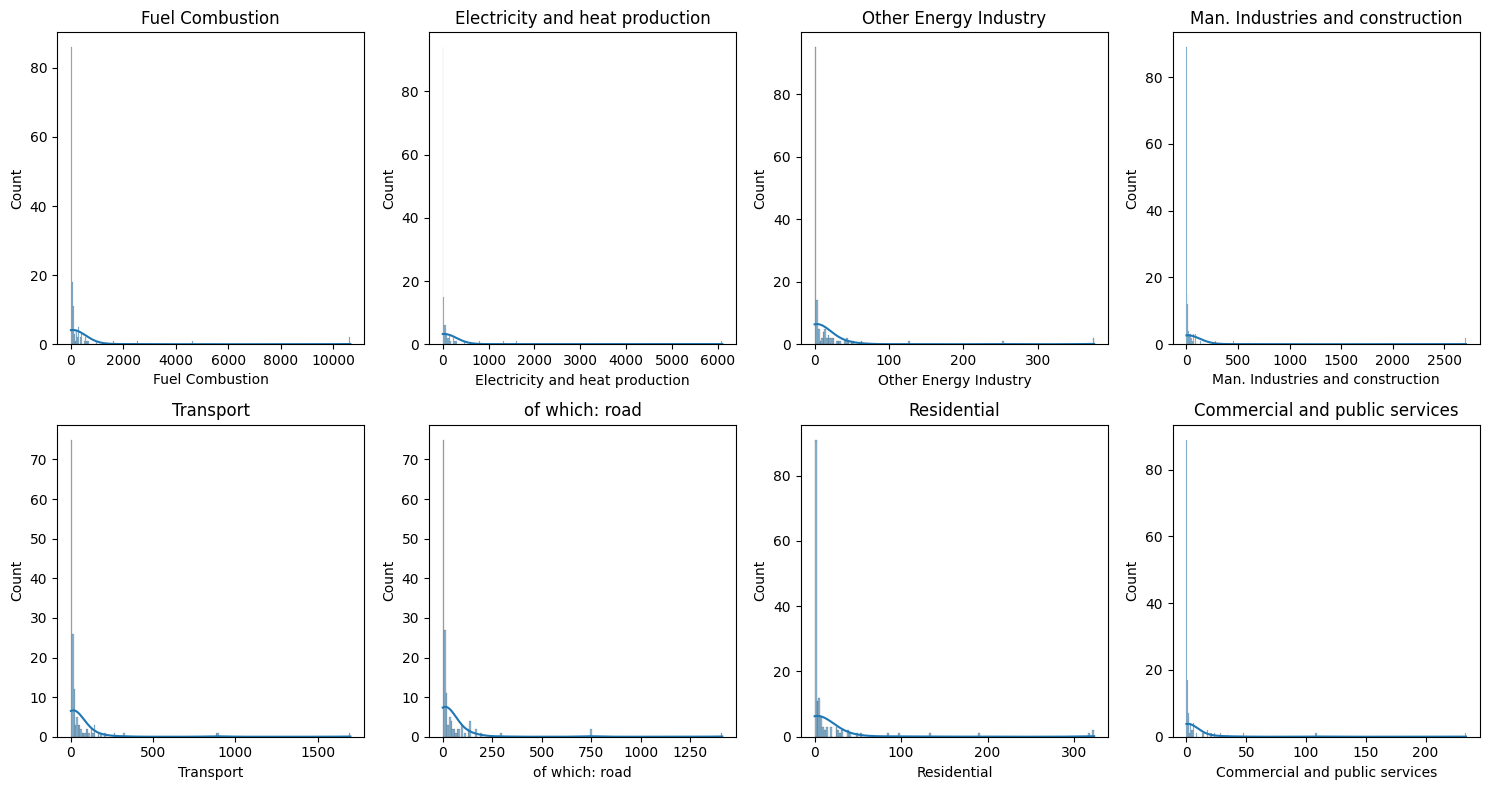

In [ ]:
# ploteando en una misma gráfica los histogramas
variables = ['Fuel Combustion', 'Electricity and heat production', 'Other Energy Industry',
             'Man. Industries and construction', 'Transport', 'of which: road',
             'Residential', 'Commercial and public services']

# Creando una figura con 8 subplots (2 filas, 4 columnas)
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Ajusta figsize según tus necesidades

# Iterando en las variables para crear un histograma en cada subplot
for i, var in enumerate(variables):
    row = i // 4  # Calcula la fila del subplot
    col = i % 4   # Calcula la columna del subplot
    sns.histplot(df_SECTOR_V2[var], ax=axes[row, col], kde=True)  # kde=True agrega una línea de densidad
    axes[row, col].set_title(var)  # Establece el título del subplot

# Ajusta el espaciado entre subplots
plt.tight_layout()
plt.show()

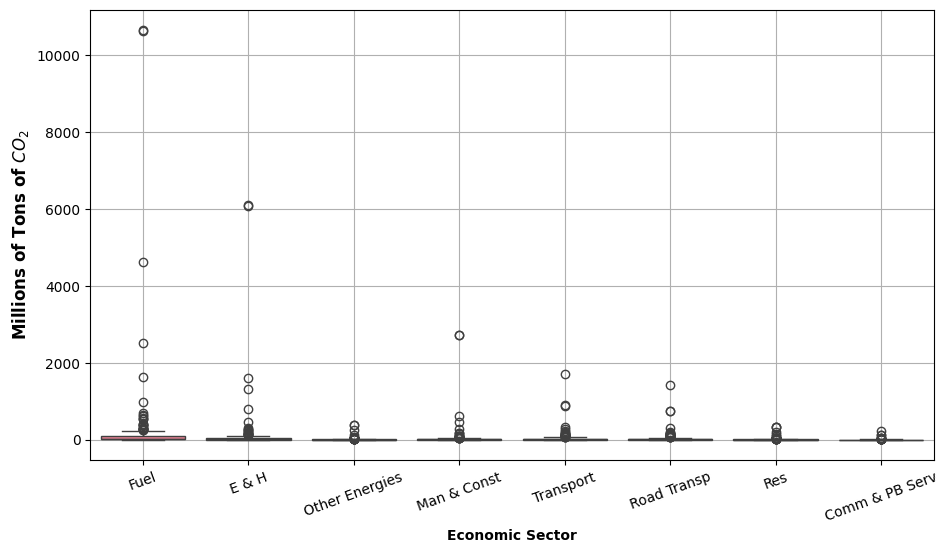

In [ ]:
# ploteando en un mismo boxplot las variables
plt.figure(figsize=(10,6))
sns.boxplot(data=df_SECTOR_V2[['Fuel Combustion',
                           'Electricity and heat production',
                           'Other Energy Industry',
                           'Man. Industries and construction',
                           'Transport',
                           'of which: road',
                           'Residential',
                           'Commercial and public services']],
            palette='husl')
sns.set(style='ticks', palette='husl', font_scale=1, font='Liberation Sans')
#plt.title('Emmisions per economic sector in 2022',fontsize=14)
plt.xlabel('Economic Sector', fontsize=10,  fontweight='bold')
plt.ylabel('Millions of Tons of $CO_2$', fontsize=12,  fontweight='bold')
My_labels=['Fuel', 'E & H', 'Other Energies', 'Man & Const', 'Transport','Road Transp', 'Res', 'Comm & PB Serv']
plt.xticks(rotation=20)
plt.xticks(range(len(My_labels)), labels=My_labels)
plt.grid(True)
plt.tight_layout(pad=2.0)
plt.savefig('boxplot_variables.svg')


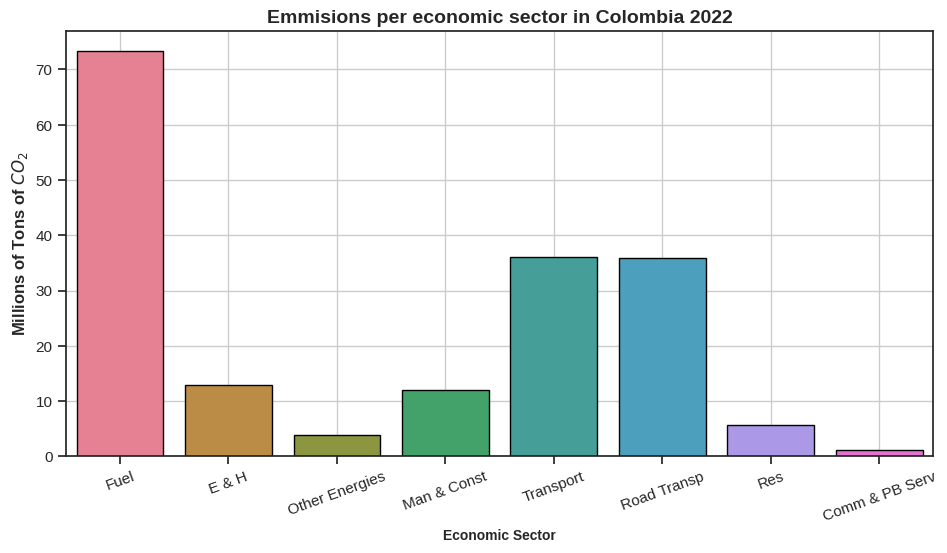

In [ ]:
# ploteando en un mismo boxplot las variables para Colombia
pais='Colombia'
df_pais=df_SECTOR_V2[df_SECTOR_V2['Country']==pais]
plt.figure(figsize=(10,6))
sns.barplot(data=df_pais[['Fuel Combustion',
                           'Electricity and heat production',
                           'Other Energy Industry',
                           'Man. Industries and construction',
                           'Transport',
                           'of which: road',
                           'Residential',
                           'Commercial and public services']],
            palette='husl', edgecolor = "black")
sns.set(style='ticks', palette='husl', font_scale=1, font='Liberation Sans')
plt.title('Emmisions per economic sector in Colombia 2022',fontsize=14, fontweight='bold')
plt.xlabel('Economic Sector', fontsize=10,  fontweight='bold')
plt.ylabel('Millions of Tons of $CO_2$', fontsize=12,  fontweight='bold')
My_labels=['Fuel', 'E & H', 'Other Energies', 'Man & Const', 'Transport','Road Transp', 'Res', 'Comm & PB Serv']
plt.xticks(rotation=20)
plt.xticks(range(len(My_labels)), labels=My_labels)
plt.grid(True)
plt.tight_layout(pad=2.0)
plt.savefig('boxplot_variables.svg')

In [ ]:
Consumo_Combustible = df_SECTOR_V2.groupby('Fuel Combustion')['Region/Country/Economy'].agg(list)
print(Consumo_Combustible)

Fuel Combustion
0.64                               [Gibraltar]
0.67                                 [Eritrea]
1.07                     [Kingdom of Eswatini]
1.59                                 [Iceland]
1.67                             [South Sudan]
1.78                                   [Malta]
1.81                                  [Rwanda]
1.92                                    [Togo]
2.28                                 [Curaçao]
2.55                                   [Gabon]
2.65                              [Montenegro]
2.83                                [Suriname]
2.92                                   [Niger]
3.04                                   [Haiti]
3.08                                  [Guyana]
3.17                       [Equatorial Guinea]
3.21                                 [Namibia]
3.61                                 [Albania]
4.02                               [Mauritius]
4.26                              [Madagascar]
4.40                                   [Cong

In [ ]:
df_Var_Sector=df_SECTOR_V2[['Fuel Combustion',
                           'Electricity and heat production',
                           'Other Energy Industry',
                           'Man. Industries and construction',
                           'Transport',
                           'of which: road',
                           'Residential',
                           'Commercial and public services']]
df_Var_Sector

,Fuel Combustion,Electricity and heat production,Other Energy Industry,Man. Industries and construction,Transport,of which: road,Residential,Commercial and public services
0,523.33,72.78,127.72,66.76,163.98,136.16,38.09,34.52
1,86.59,29.35,1.86,15.99,31.19,28.58,4.66,2.25
2,73.29,12.87,3.85,11.92,36.09,35.80,5.68,1.14
3,7.58,0.00,0.00,1.24,5.71,5.67,0.27,0.16
4,379.68,126.29,45.69,45.06,129.81,126.22,18.73,4.63
5,4607.59,1609.77,252.70,455.42,1699.43,1413.47,317.88,233.87
6,354.78,164.61,40.27,39.96,89.19,75.46,8.93,4.57
7,59.60,33.12,1.83,3.60,18.69,18.43,0.48,0.40
8,973.67,469.36,33.50,170.59,186.46,166.32,49.25,47.41
9,549.31,283.97,42.47,66.27,105.91,99.98,30.83,13.91


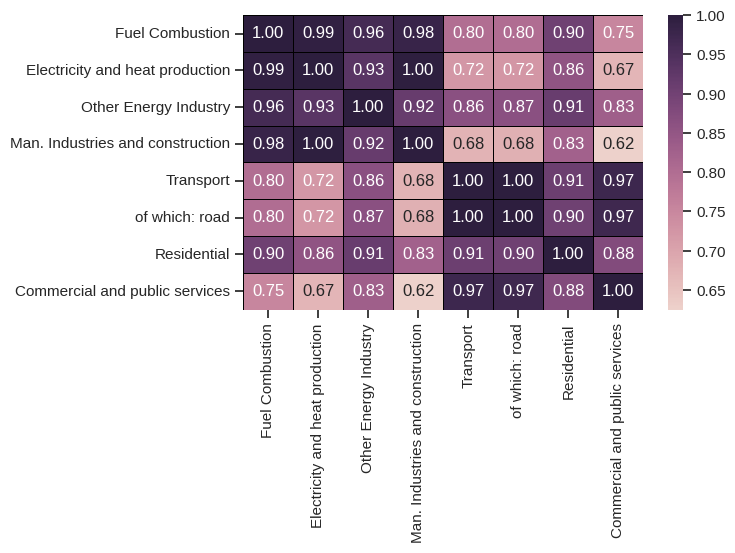

In [ ]:
# Ploteando la matríz de correlación
corr_df = df_Var_Sector.corr(method="pearson")

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5, linecolor='black', cbar=True)
plt.tight_layout(pad=2.0)
plt.savefig('Corr.svg')

___________________________________________________
$$Haciendo \space PCA$$
___________________________________________________

In [ ]:
import statsmodels.api as sm

# Gráficos
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
# Seleccionando solo las columnas de valor numérico
numeric_cols = df_SECTOR_V2.select_dtypes(include=np.number).columns
df_SECTOR_V2[numeric_cols].mean(axis=0)

----------------------
Media de cada variable
----------------------


,0
Fuel Combustion,288.44
Electricity and heat production,139.22
Other Energy Industry,13.50
Man. Industries and construction,59.33
Transport,50.77
of which: road,44.66
Residential,14.95
Commercial and public services,5.88


In [ ]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df_SECTOR_V2[numeric_cols].var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


,0
Fuel Combustion,1656990.38
Electricity and heat production,513012.47
Other Energy Industry,2410.12
Man. Industries and construction,99800.17
Transport,30551.57
of which: road,21483.66
Residential,2442.09
Commercial and public services,547.24


In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_SECTOR_V2[numeric_cols])

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
n_components = modelo_pca.n_components_
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = numeric_cols,
    index   = [f'PC{i+1}' for i in range(n_components)]
)

,Fuel Combustion,Electricity and heat production,Other Energy Industry,Man. Industries and construction,Transport,of which: road,Residential,Commercial and public services
PC1,0.36,0.35,0.37,0.34,0.35,0.35,0.36,0.34
PC2,0.29,0.41,0.12,0.47,-0.39,-0.39,-0.07,-0.45
PC3,-0.05,-0.07,-0.31,-0.08,-0.11,-0.16,0.91,-0.17
PC4,-0.18,-0.23,0.84,-0.22,-0.24,-0.25,0.18,0.06
PC5,0.04,0.11,-0.22,0.07,-0.36,-0.40,-0.01,0.80
PC6,-0.15,-0.54,-0.01,0.63,-0.37,0.38,0.03,0.05
PC7,-0.04,-0.37,0.00,0.39,0.62,-0.57,-0.02,0.01
PC8,0.85,-0.46,-0.03,-0.23,-0.09,-0.02,-0.04,-0.02


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[8.7344575e-01 1.0675415e-01 1.0591526e-02 5.0159208e-03 3.9023005e-03
 2.1396644e-04 7.5740521e-05 5.9220497e-07]


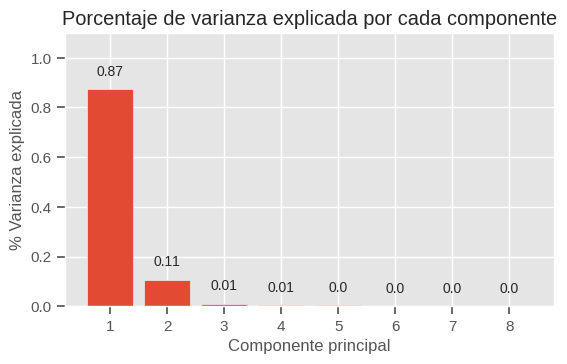

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)
fig.patch.set_edgecolor('black')

for x, y in zip(np.arange(len(df_SECTOR_V2.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('% Varianza explicada')
plt.tight_layout(pad=2.0)
plt.savefig('Var.svg');

In [ ]:
pca=PCA(n_components=2) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(df_SECTOR_V2[numeric_cols]) # obtener los componentes principales
X_pca=pca.transform(df_SECTOR_V2[numeric_cols]) # convertimos nuestros datos con las nuevas dimensiones de PCA

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

shape of X_pca (151, 2)
[0.9874149 0.0122548]
suma: 0.9996697


In [ ]:
import plotly.express as px
pca_values = modelo_pca.transform(df_SECTOR_V2[numeric_cols])
PC1 = pca_values[:, 0] # Valores de PC1 para las UE
PC2 = pca_values[:,1]  # Valores de  PC2 para las UE
countries = df_SECTOR_V2['Country'] # Tomando los nombres de las UE (paises)

# Creando el DF para poder usar plotly
df_pca = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'Country': countries})

#fig=px.scatter(df_pca, x='PC1',y='PC2', color='Country', size='PC2', hover_data=['PC1'], symbol="Country")
fig=px.scatter(df_pca, x='PC1',y='PC2', color='Country', hover_data='PC1', text='Country', width= 1328, height=720)
fig.update_traces(textposition="bottom right", marker_line_width=2, marker_size=14)
fig.update_layout(
    title=dict(text='PCA Scatter Plot'),
                  yaxis_zeroline=False, xaxis_zeroline=False)
marker=dict(
        line_width=3
)


fig.show()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


PC   feature                           loading  type
PC1  Fuel Combustion                   0.36     weak    1
     Other Energy Industry             0.37     best    1
     Residential                       0.36     weak    1
PC2  Commercial and public services    -0.45    weak    1
     Electricity and heat production   0.41     weak    1
     Man. Industries and construction  0.47     best    1
     Transport                         -0.39    weak    1
     of which: road                    -0.39    weak    1
Name: count, dtype: int64

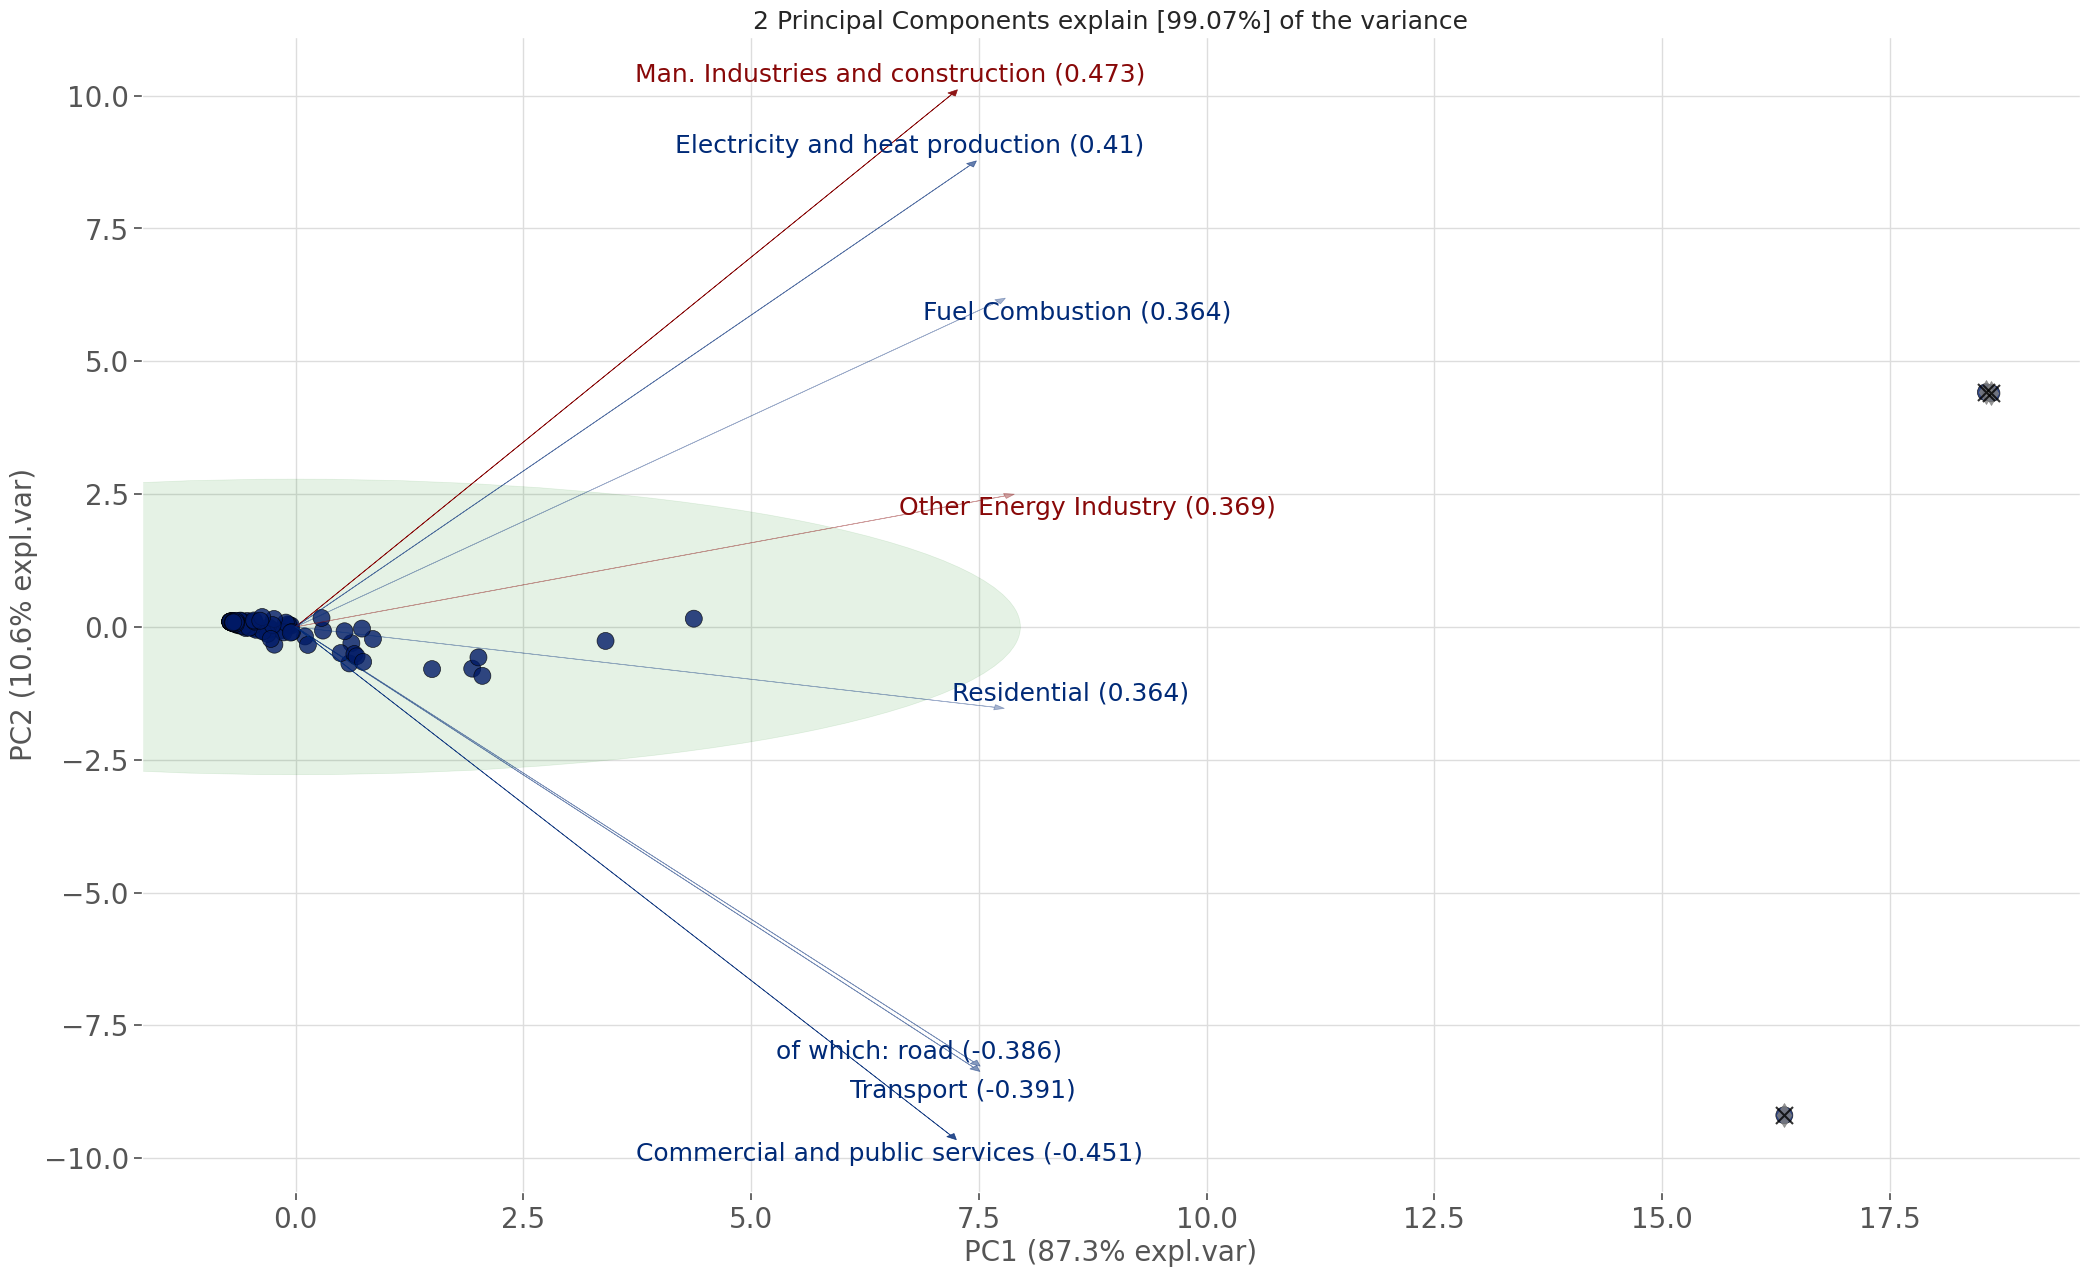

In [ ]:
model.biplot(SPE=True, HT2=True, legend=1)
results['topfeat'].value_counts()